In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

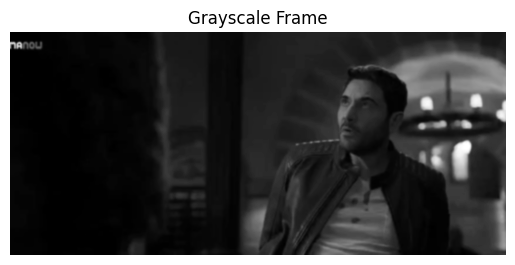

In [7]:
# read a video
video_path = os.path.join('vids', 'welad rizk.mp4')
video = cv2.VideoCapture(video_path)
video.set(cv2.CAP_PROP_FPS, 30)
video.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# read the first frame
ret, frame = video.read()
if not ret:
    print("Failed to read video")
    exit()
# convert to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# apply Gaussian blur
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# display the result

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Frame")
plt.axis('off')
plt.show()

In [12]:
import cv2
import os

def extract_frames(video_path, save_dir, fps_limit=10):
    cap = cv2.VideoCapture(video_path)
    video_fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(video_fps / fps_limit)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    count = 0
    saved = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            resized = cv2.resize(frame, (640, 480))
            cv2.imwrite(os.path.join(save_dir, f'frame_{saved:04}.png'), resized)
            saved += 1
        count += 1
    cap.release()


In [13]:
extract_frames("./vids/x-meraty.mp4", "./output_frames/x-meraty", fps_limit=10)

In [16]:
extract_frames("./vids/2rd_el_nefak.mp4", "./output_frames/2rd_el_nefak", fps_limit=10)

In [14]:
import cv2

def detect_face(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return len(faces), faces


In [17]:
detect_face("./output_frames/2rd_el_nefak/frame_0107.png")

(4,
 array([[214, 376,  70,  70],
        [345,  68, 218, 218],
        [366, 287,  79,  79],
        [157, 131, 152, 152]]))

In [22]:
!pip install --upgrade ultralytics

   ---------------------------------------- 0.0/950.0 kB ? eta -:--:--
   --------------------------------- ------ 786.4/950.0 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 950.0/950.0 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.88
    Uninstalling ultralytics-8.2.88:
      Successfully uninstalled ultralytics-8.2.88


    Markdown (>=3.0<3.3) ; python_version < "3.6"
             ~~~~~~^



image 1/1 c:\Users\001\OneDrive\Desktop\GUC\semester 10\dlcv\DLCV-Project\output_frames\2rd_el_nefak\frame_0107.png: 480x640 2 persons, 159.6ms
Speed: 1.2ms preprocess, 159.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
Number of faces detected: 2


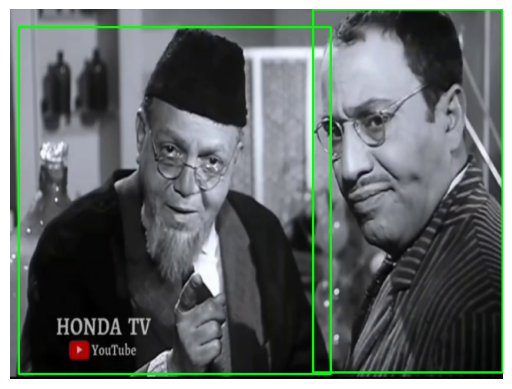

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def count_faces_yolo(image_path, model_path='yolo11s.pt', conf_threshold=0.5, show=False):
    """
    Detect and count faces in an image using YOLOv8.

    Parameters:
        image_path (str): Path to the input image.
        model_path (str): Path to the YOLOv8 face detection model.
        conf_threshold (float): Confidence threshold for detections.
        show (bool): If True, displays the image with detected faces.

    Returns:
        int: Number of faces detected.
        list: List of bounding boxes [x1, y1, x2, y2] for each face.
    """
    model = YOLO(model_path)
    model.to('cpu')

    results = model(image_path, conf=conf_threshold)

    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

    if show:
        img = cv2.imread(image_path)

        for box in boxes:
            x1, y1, x2, y2 = box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')

    return len(boxes), boxes.tolist()

image_path = './output_frames/2rd_el_nefak/frame_0107.png'
num_faces, face_boxes = count_faces_yolo(image_path, show=True)
print(f"Number of faces detected: {num_faces}")



image 1/1 c:\Users\001\OneDrive\Desktop\GUC\semester 10\dlcv\DLCV-Project\output_frames\x-meraty\frame_0020.png: 480x640 1 person, 174.6ms
Speed: 1.2ms preprocess, 174.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
Number of faces detected: 1


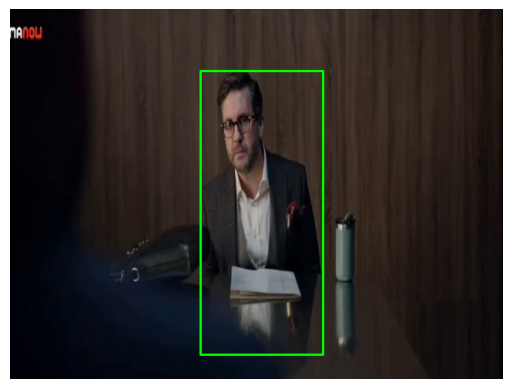

In [6]:
image_path = './output_frames/x-meraty/frame_0020.png'
num_faces, face_boxes = count_faces_yolo(image_path, show=True)
print(f"Number of faces detected: {num_faces}")